In [1]:
source("../../BrusselSprouts/scripts/functions.R")
crosses=readLines("~/data/trd/mapped_reads/TRD.vcf.gz.samples")
crosses=crosses[startsWith(crosses, "YJNRC") | startsWith(crosses, "Chris")]
crosses


Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




[1] "ChrisC1" "ChrisC2" "ChrisC3" "ChrisC4" "ChrisC5" "ChrisC6" "ChrisC7"
 [8] "ChrisC8" "YJNRC17" "YJNRC18" "YJNRC2"

In [2]:
Crosses=readxl::read_xlsx("~/data/trd/Crosses.xlsx", sheet=2)
cc=data.frame("Cross ID"=c(paste0("ChrisC",1:8)),
                                  "Short name 1"=c("ACP","BAP","CCD","ATE","ACK","AKE","BAH","ANG"),
                                  "Short name 2"=c("BFP","CMP","CPG","SACE_YCR","ACV","BAH","CGD","CEI"), stringsAsFactors=FALSE)
colnames(cc)=str_replace_all(colnames(cc), fixed("."), " ")
head(Crosses<-bind_rows(Crosses[,c("Cross ID","Short name 1","Short name 2")],
                        cc))
tail(Crosses)

New names:
* `Is in Stock` -> `Is in Stock...4`
* `Is in Stock` -> `Is in Stock...6`


Cross ID Short name 1 Short name 2
1 YJNRC1   BAK          BET         
2 YJNRC2   BAN          BTI         
3 YJNRC3   AKH          BQC         
4 YJNRC4   ABS          BEF         
5 YJNRC5   BAK          BMK         
6 YJNRC6   BAN          CRB

Cross ID Short name 1 Short name 2
1 ChrisC3  CCD          CPG         
2 ChrisC4  ATE          SACE_YCR    
3 ChrisC5  ACK          ACV         
4 ChrisC6  AKE          BAH         
5 ChrisC7  BAH          CGD         
6 ChrisC8  ANG          CEI

In [3]:
getAD=function(x){
    allele_count=str_count(OH_vs_cross$ADcross[x], ",")
    AD3_0=as.numeric(strsplit(OH_vs_cross$ADcross[x], ",", fixed=TRUE)[[1]][1])
    AD3_1=as.numeric(strsplit(OH_vs_cross$ADcross[x], ",", fixed=TRUE)[[1]][2])
    if(allele_count>1){
        AD3_2=as.numeric(strsplit(OH_vs_cross$ADcross[x], ",", fixed=TRUE)[[1]][3])
        if(allele_count>2){
            AD3_3=as.numeric(strsplit(OH_vs_cross$ADcross[x], ",", fixed=TRUE)[[1]][4])
        }else{
            AD3_3=NA
        }
    }else{
        AD3_2=NA
        AD3_3=NA
    }
    return(data.frame(AD3_0=AD3_0,AD3_1=AD3_1,AD3_2=AD3_2,AD3_3=AD3_3))
}

isSNP=function(x){
    Alleles=OH_vs_cross$alleles[x]
    Alleles=strsplit(Alleles, ",", fixed=TRUE)[[1]]
    return(sum(str_length(Alleles)==1)==length(Alleles))
}
PosMinus1Except1=function(x){
    if(1 %in% x){
        x[x==1]=x[x==1]+1
    }
    return(x-1)
}

In [4]:
    options(repr.plot.width=10, repr.plot.height=3)


[1] "ChrisC1"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] "Fraction AD_A1==sumCount: 0"
[1] "Mean AF: 0.48413668966268"


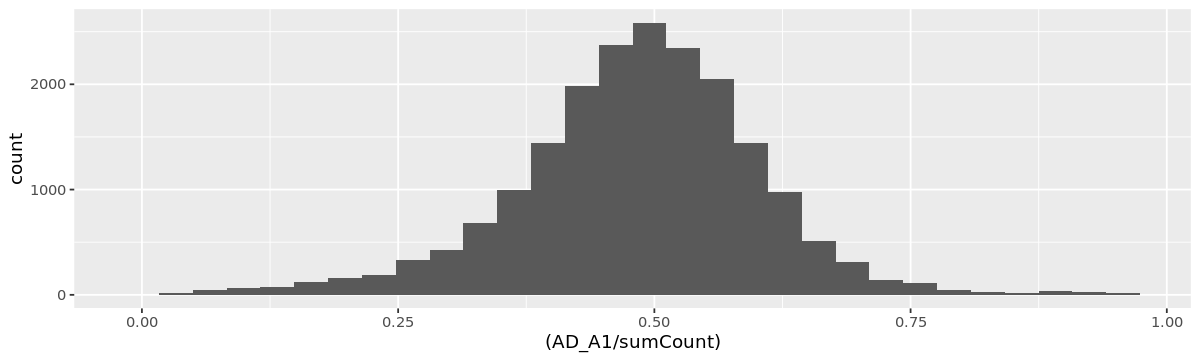

   ID lengthSNPs global_start global_end
10 10        906      4460431    5050575


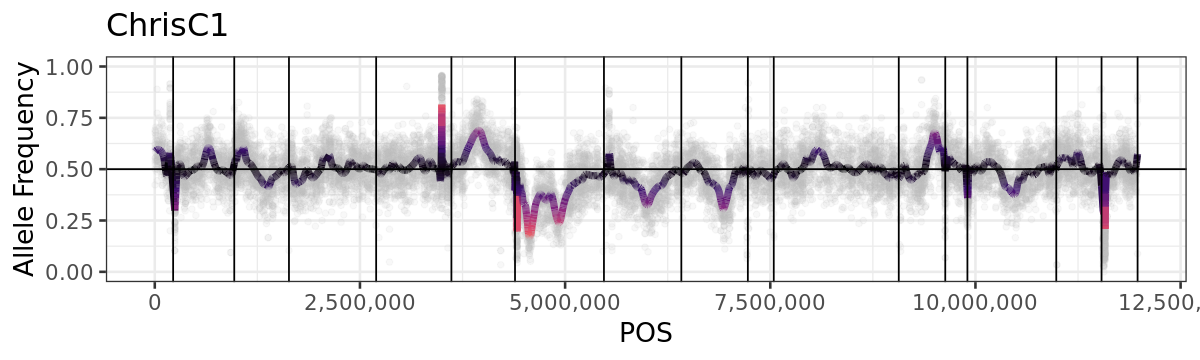

[1] "ChrisC2"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


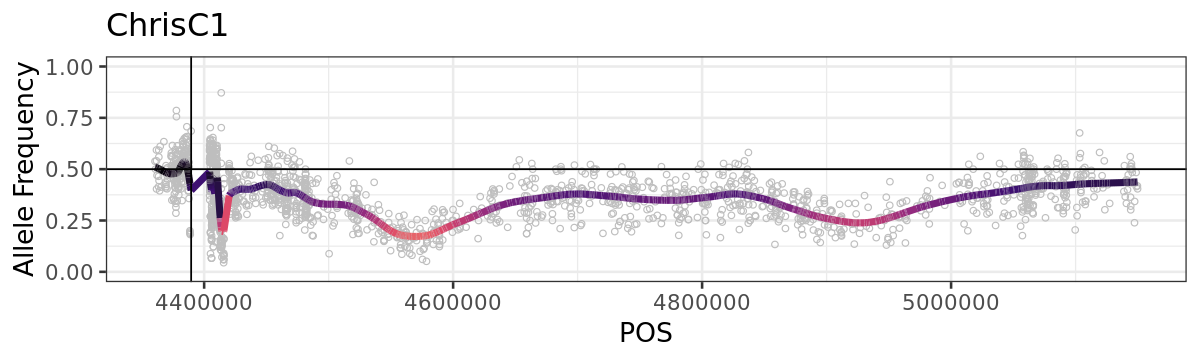

[1] "Fraction AD_A1==sumCount: 0"
[1] "Mean AF: 0.491963753677451"


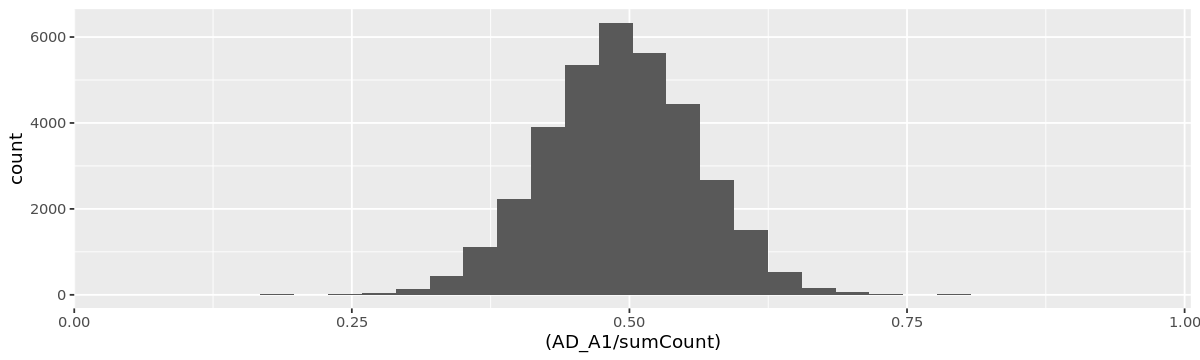

[1] ID           lengthSNPs   global_start global_end  
<0 rows> (or 0-length row.names)
[1] "ChrisC3"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


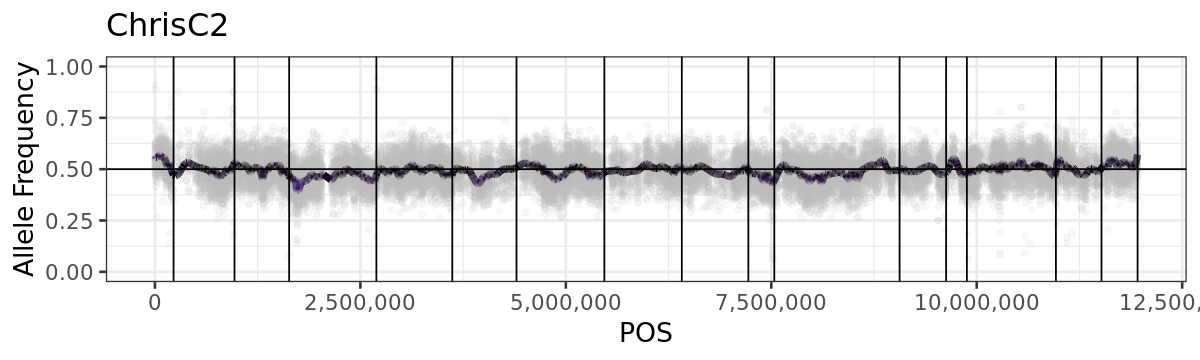

[1] "Fraction AD_A1==sumCount: 2.43483765719921e-05"
[1] "Mean AF: 0.523952372954963"


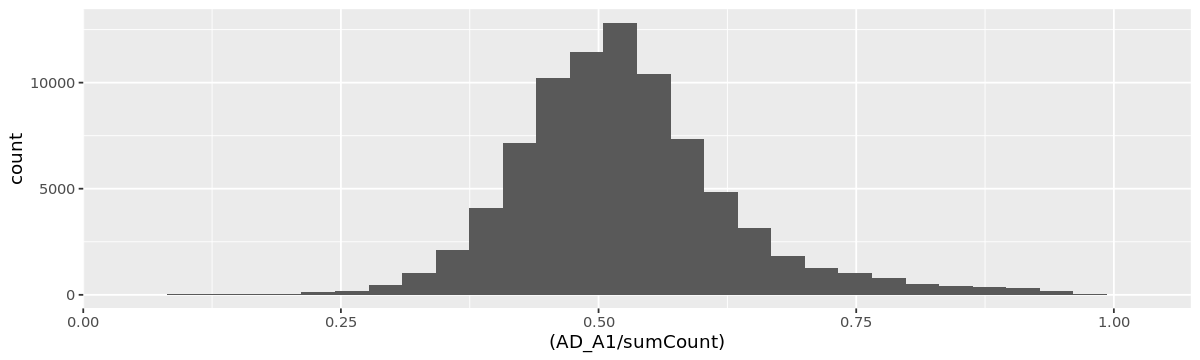

   ID lengthSNPs global_start global_end
2   2        776       926539     959898
3   3        949      1000263    1153828
4   4        672      2674201    2686847
11 11        955      9074613    9120859
12 12       2852      9150405    9452235
13 13       1218      9578063    9616752


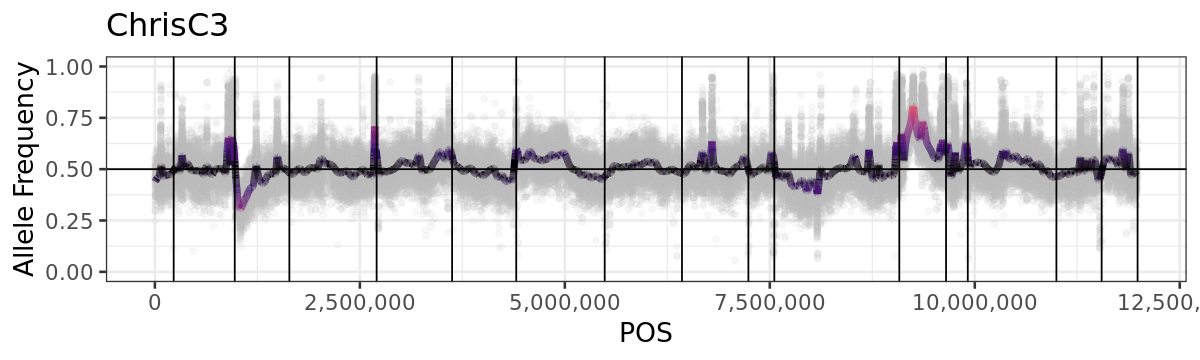

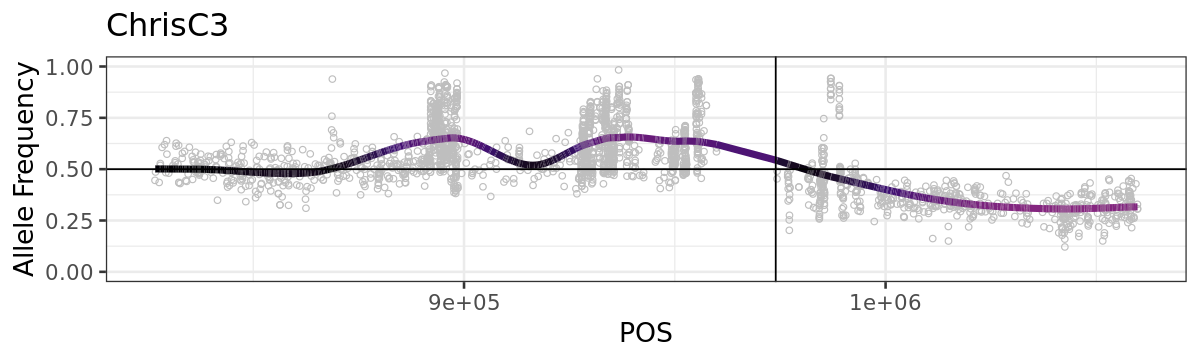

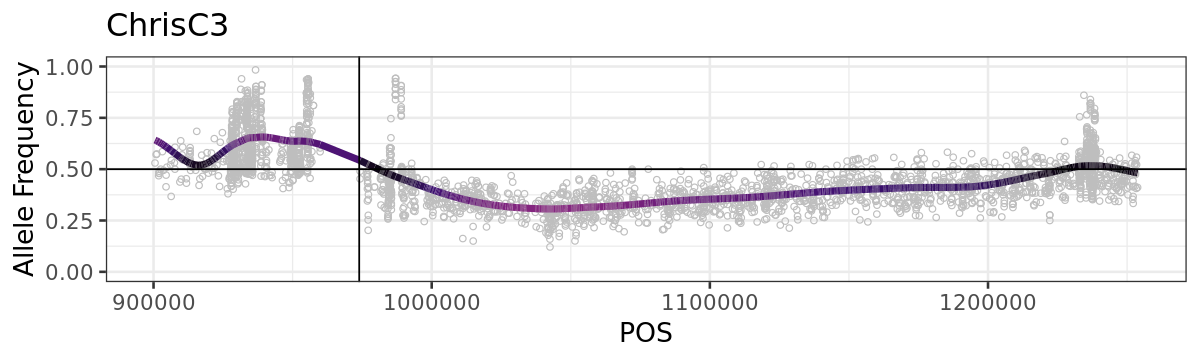

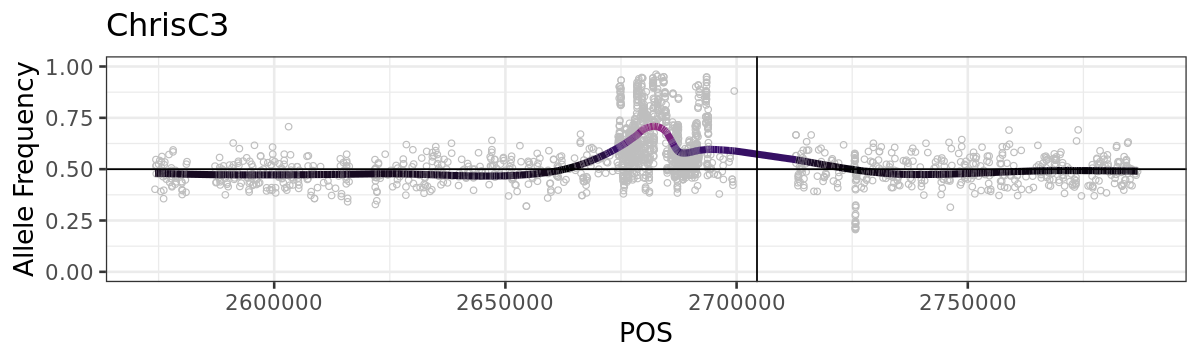

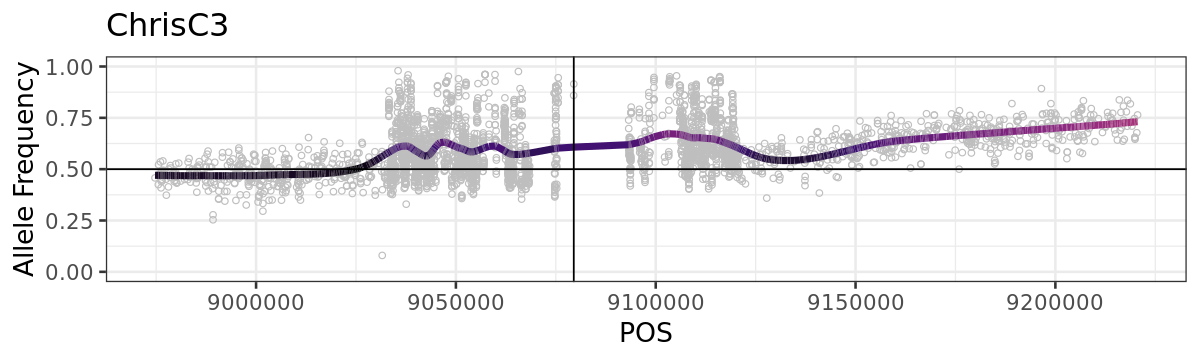

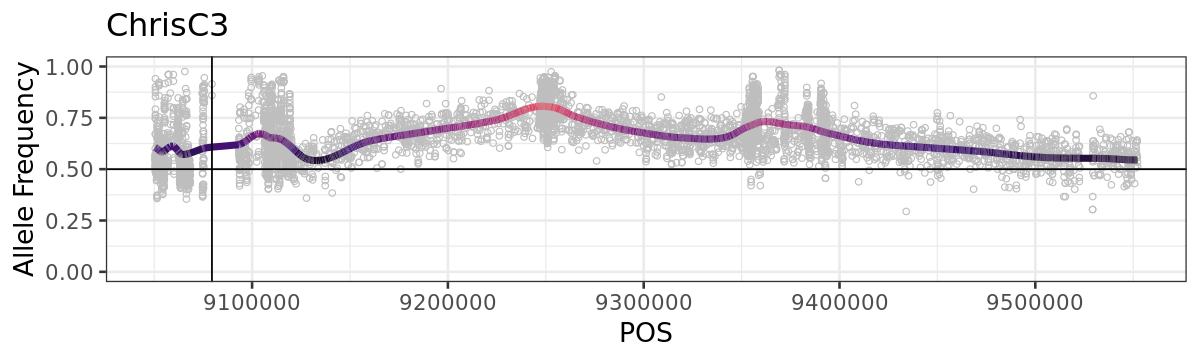

[1] "ChrisC4"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


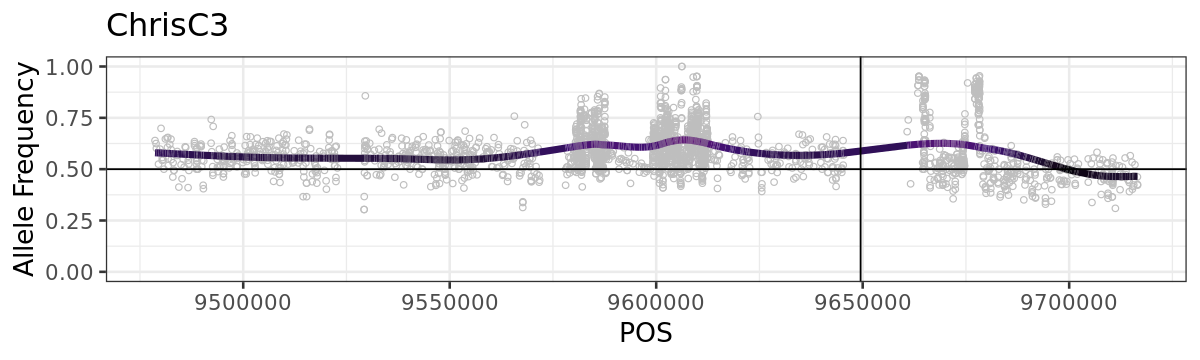

[1] "Fraction AD_A1==sumCount: 0"
[1] "Mean AF: 0.500867729354394"


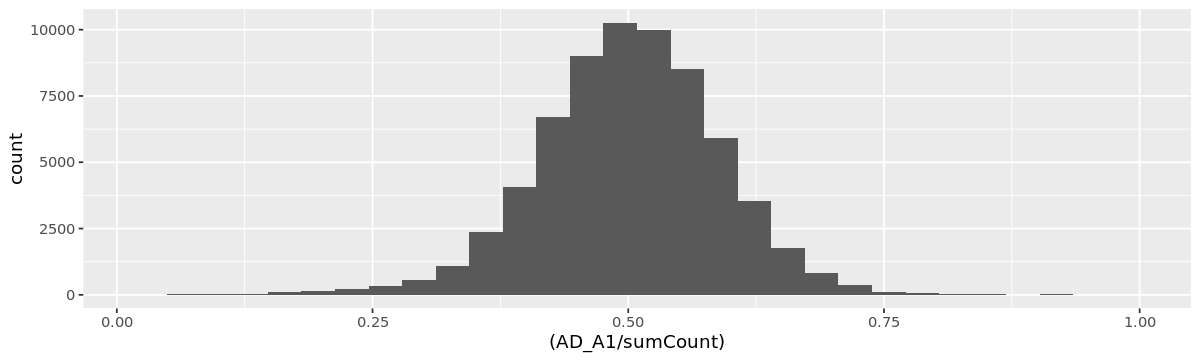

[1] ID           lengthSNPs   global_start global_end  
<0 rows> (or 0-length row.names)
[1] "ChrisC5"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


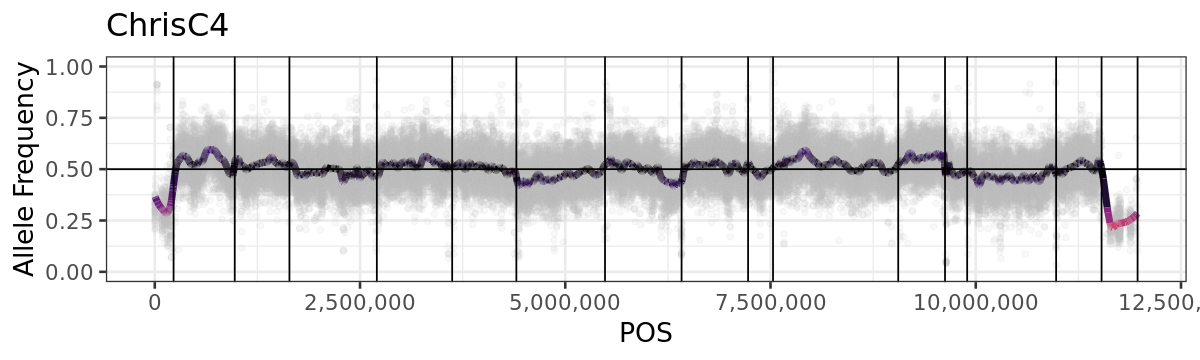

[1] "Fraction AD_A1==sumCount: 0"
[1] "Mean AF: 0.452092245676569"


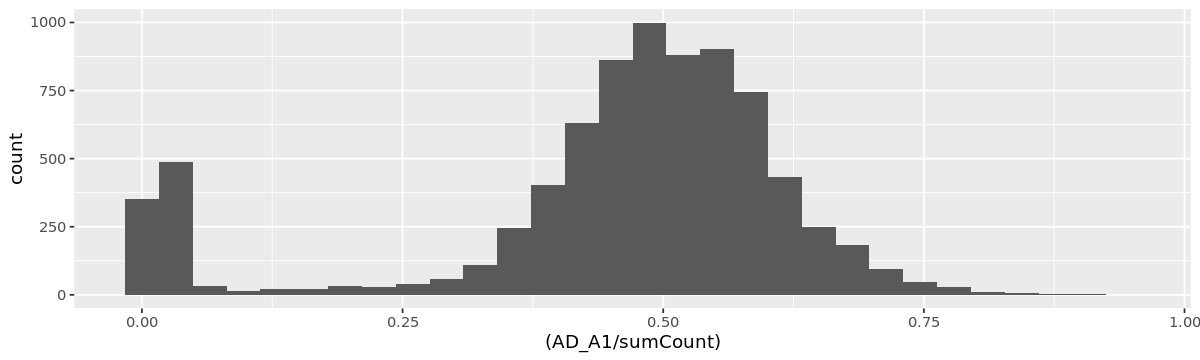

[1] ID           lengthSNPs   global_start global_end  
<0 rows> (or 0-length row.names)
[1] "ChrisC6"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


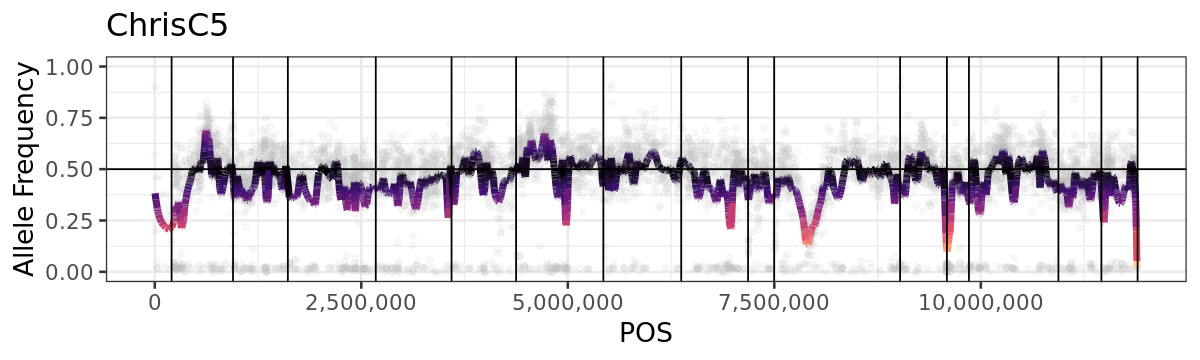

[1] "Fraction AD_A1==sumCount: 0"
[1] "Mean AF: 0.509776070565189"


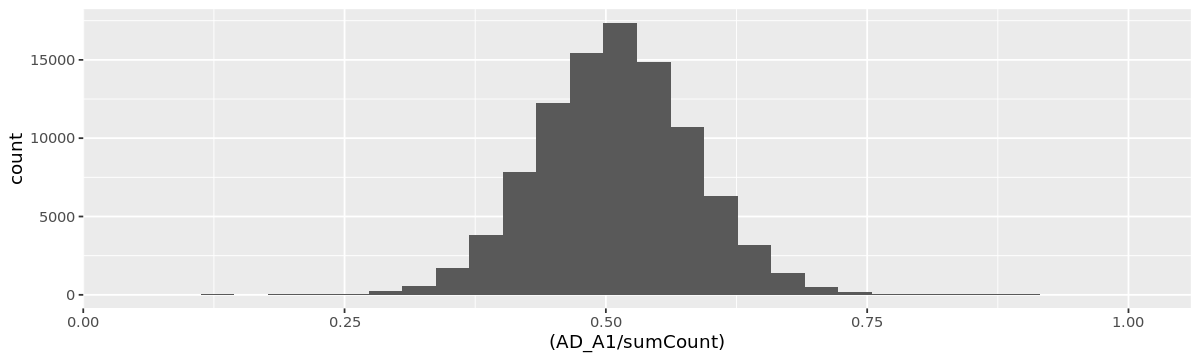

[1] ID           lengthSNPs   global_start global_end  
<0 rows> (or 0-length row.names)
[1] "ChrisC7"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


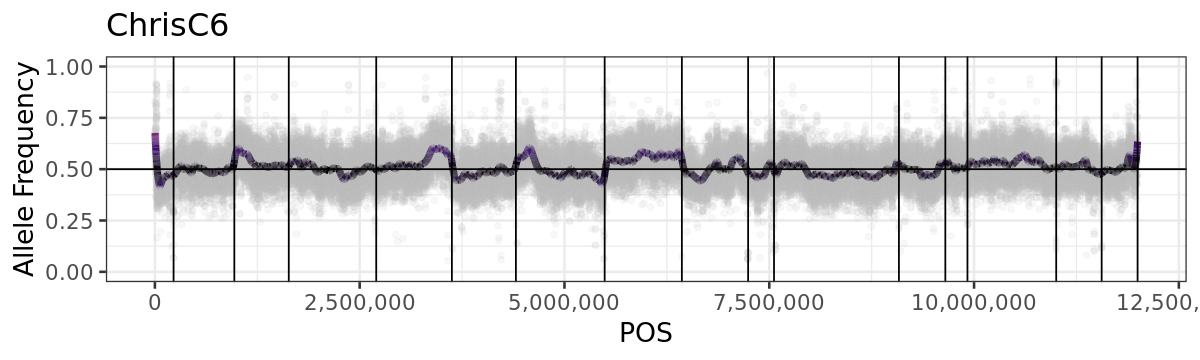

[1] "Fraction AD_A1==sumCount: 7.85648814979704e-05"
[1] "Mean AF: 0.529735684518081"


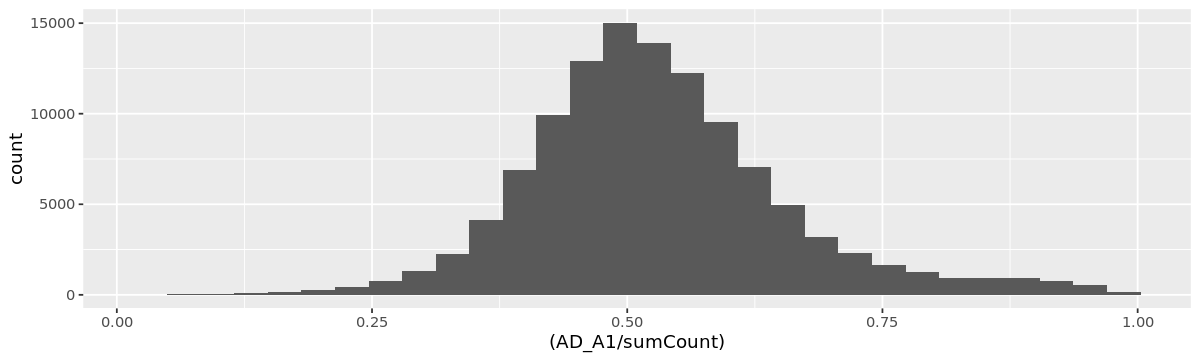

   ID lengthSNPs global_start global_end
1   1        742       314227     342191
2   2        842       926322     956735
3   3       1342      1006852    1145495
4   4        871      2662060    2697616
5   5       1040      3392169    3507684
6   6       2267      4441779    4701328
11 11        530      9093730    9129184
12 12       3969      9184704    9483528
15 15       7634     10118196   10880847


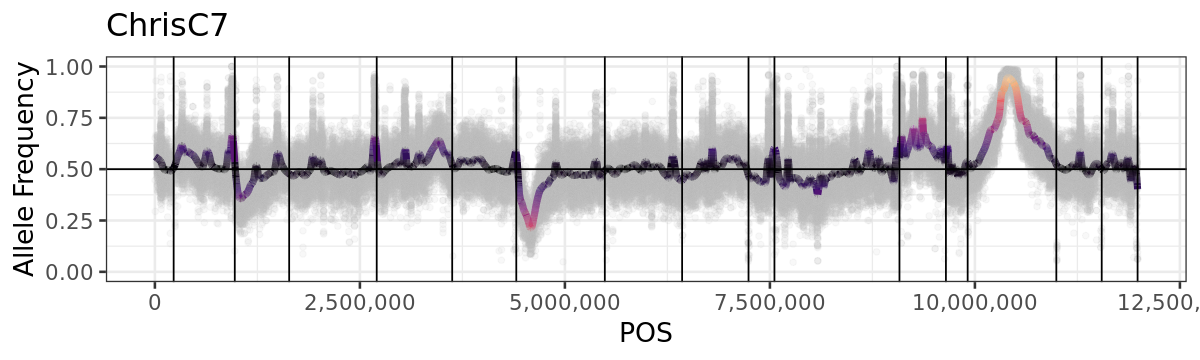

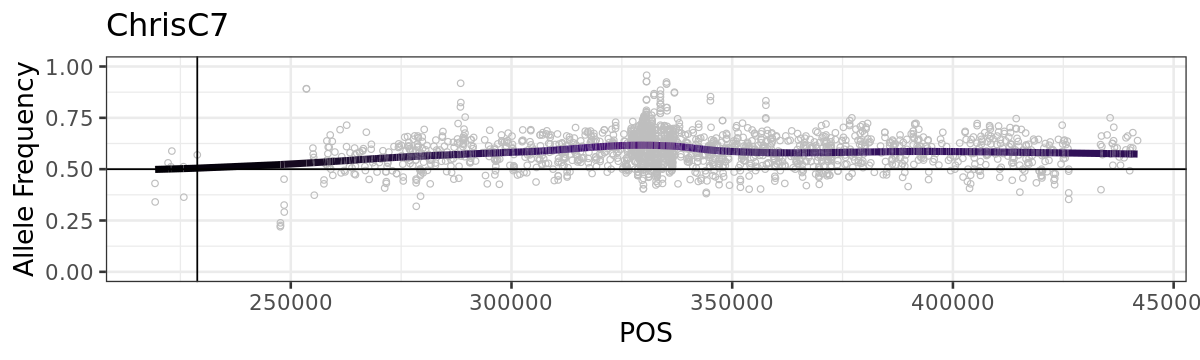

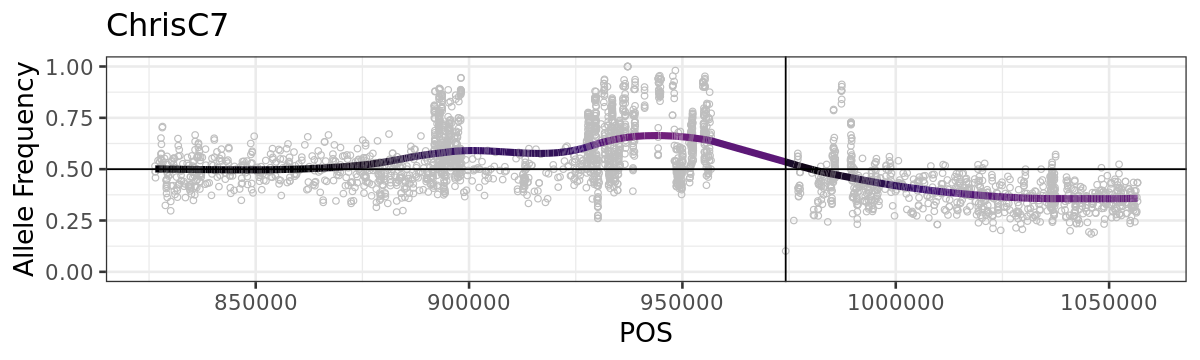

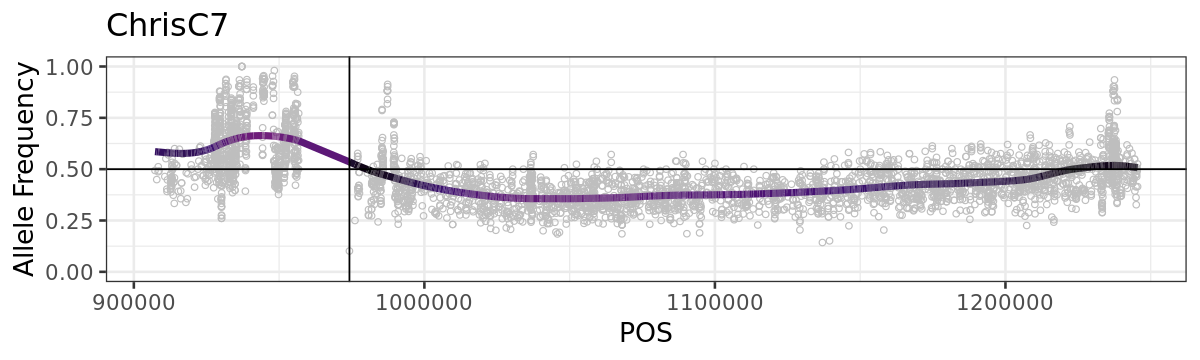

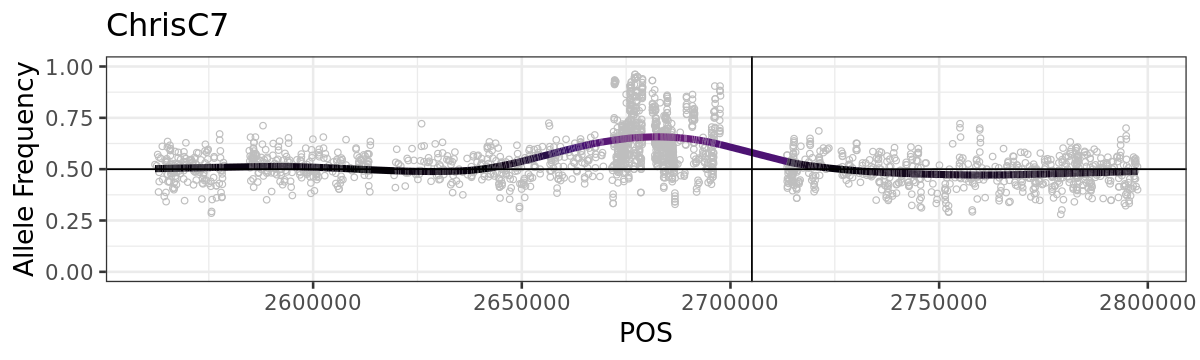

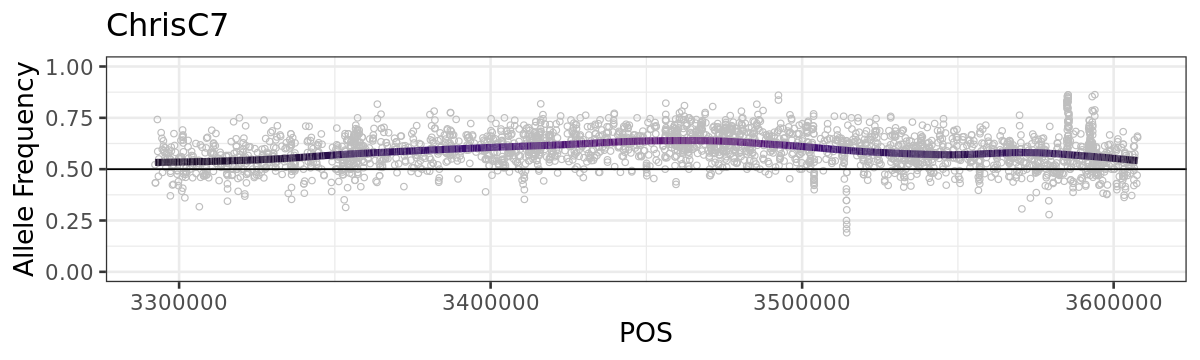

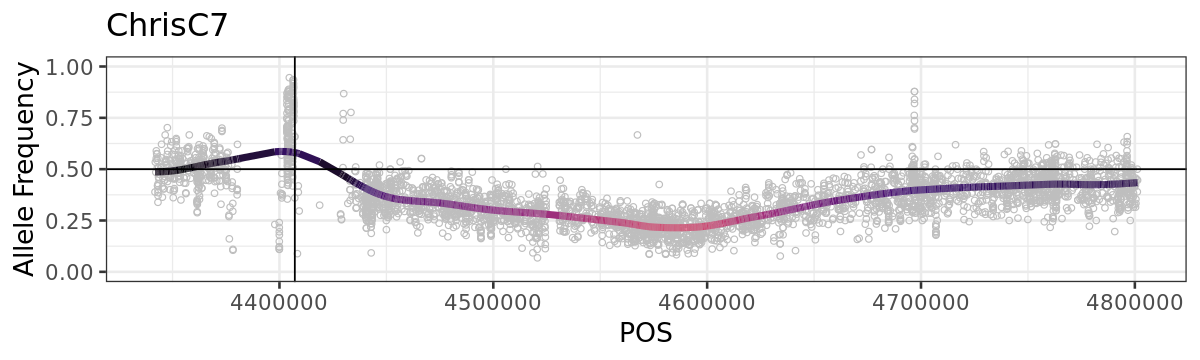

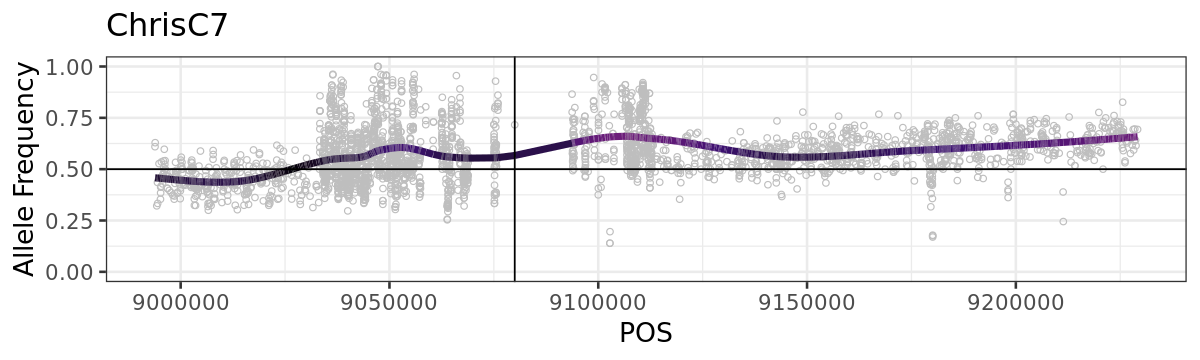

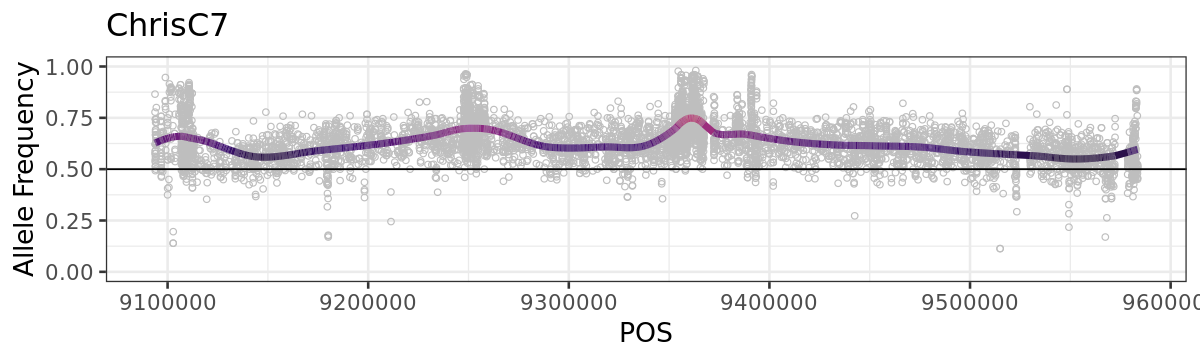

[1] "ChrisC8"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


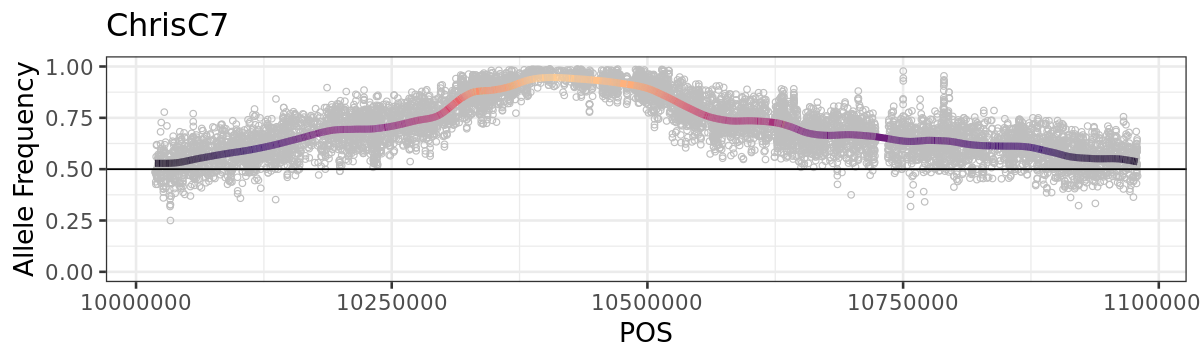

[1] "Fraction AD_A1==sumCount: 7.30380162874776e-06"
[1] "Mean AF: 0.54561050661548"


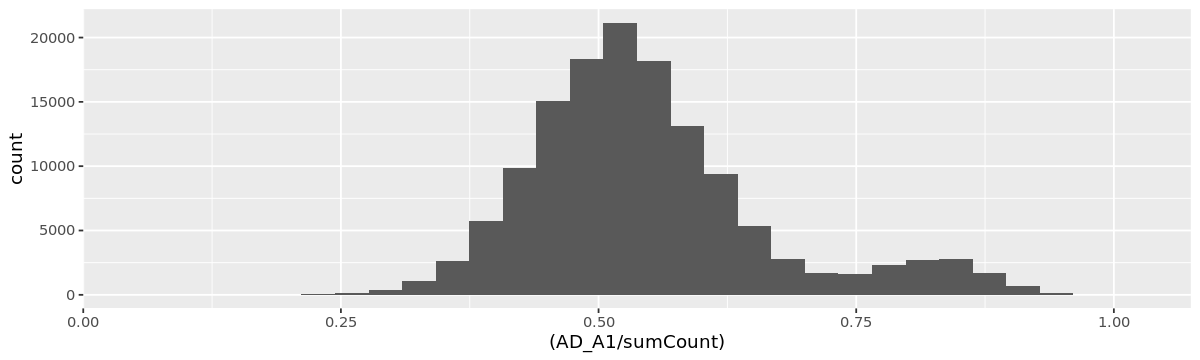

  ID lengthSNPs global_start global_end
1  1       3261      1368848    1585687
2  2        878      2624182    2692157
3  3      10973      5479201    6442621
4  4       1310      7887101    7999899
6  6       1972      9149478    9311502


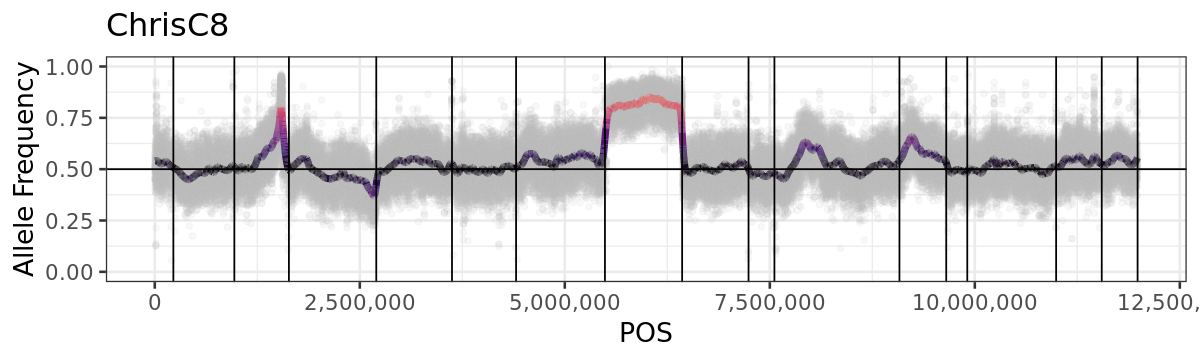

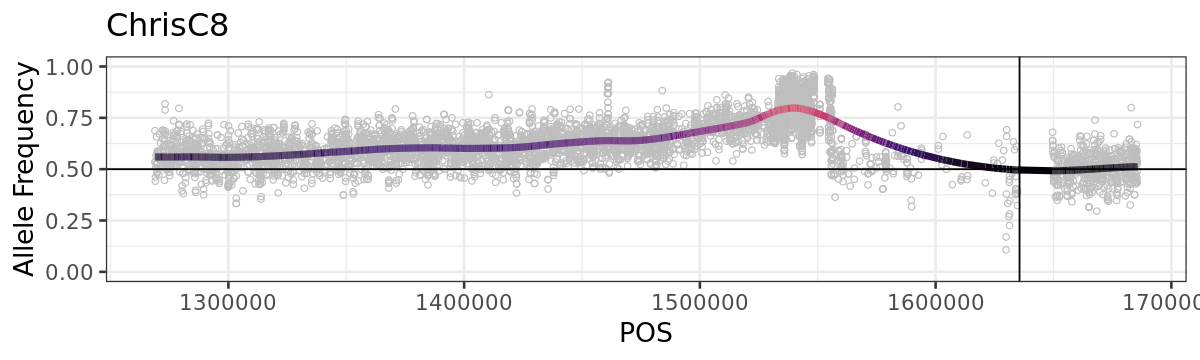

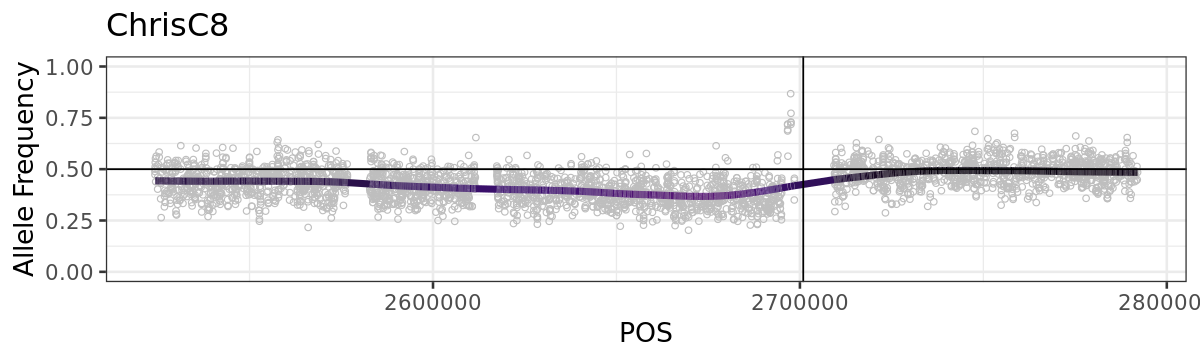

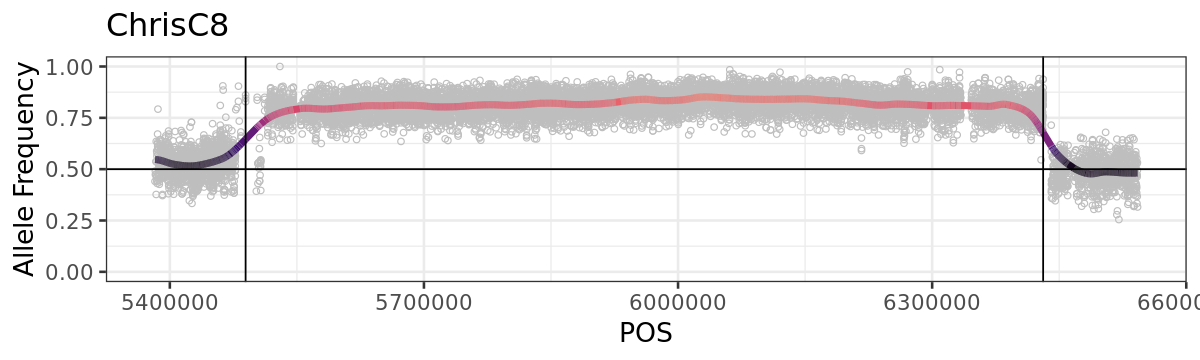

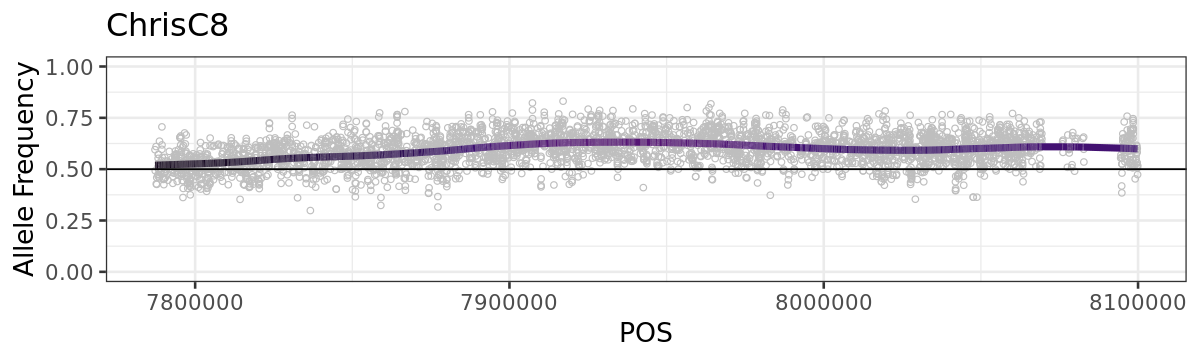

[1] "YJNRC17"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


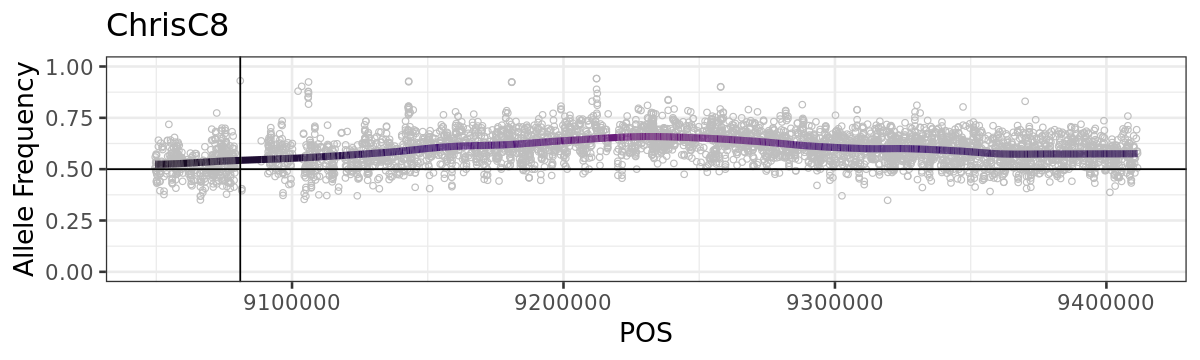

[1] "Fraction AD_A1==sumCount: 0.00243347201507183"
[1] "Mean AF: 0.533288503255526"


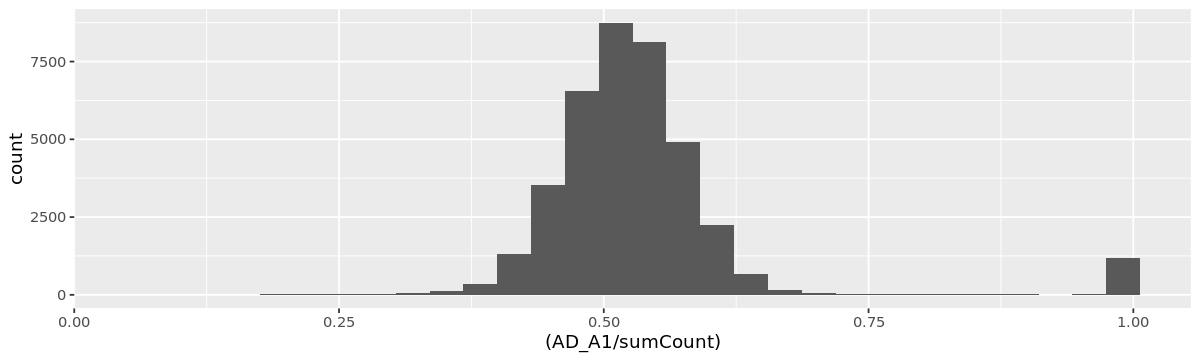

[1] ID           lengthSNPs   global_start global_end  
<0 rows> (or 0-length row.names)
[1] "YJNRC18"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


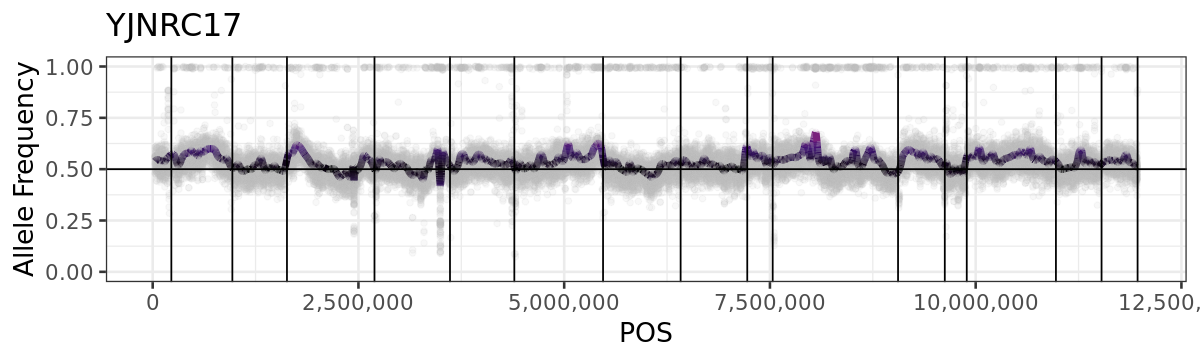

[1] "Fraction AD_A1==sumCount: 0.000876345414915848"
[1] "Mean AF: 0.508376479683489"


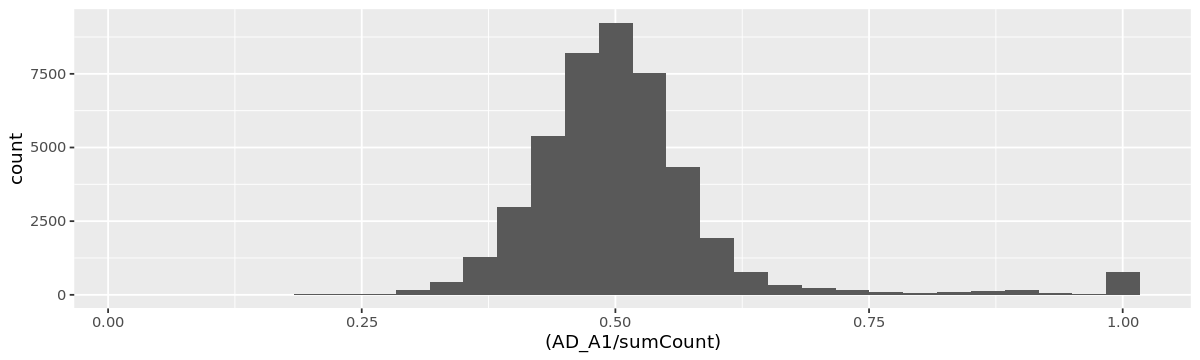

   ID lengthSNPs global_start global_end
2   2        567      2914698    3079743
9   9        618      7906255    8044303
11 11       1257      9053057    9371306


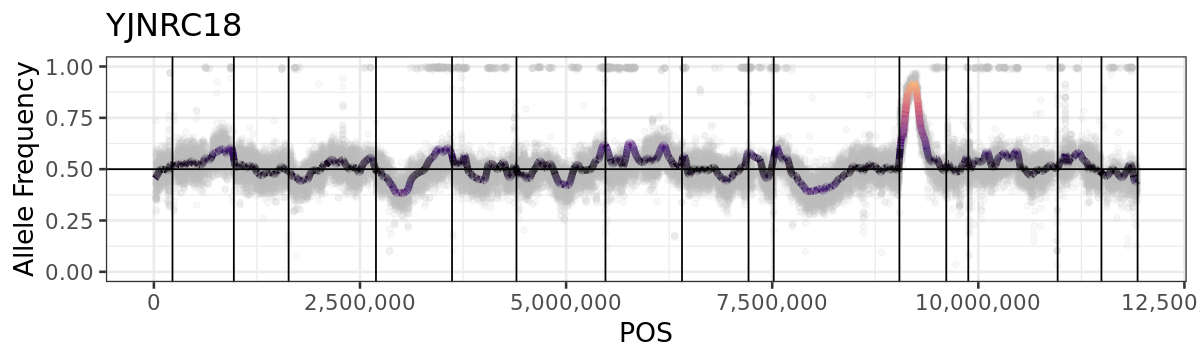

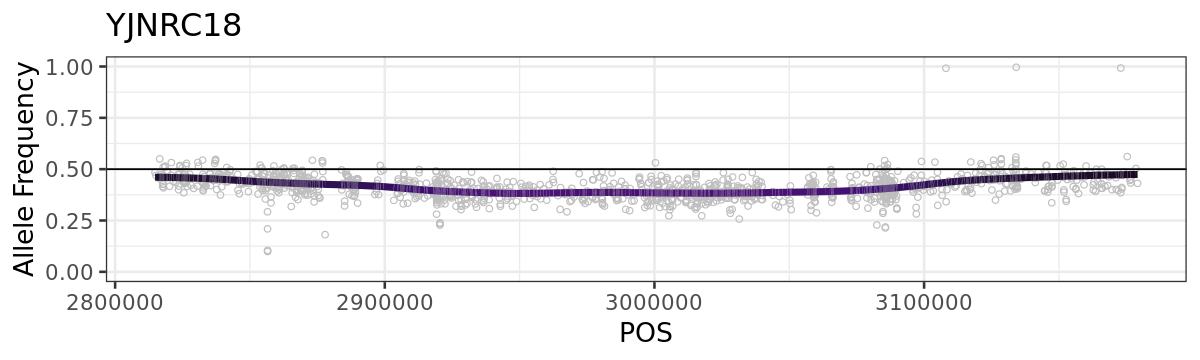

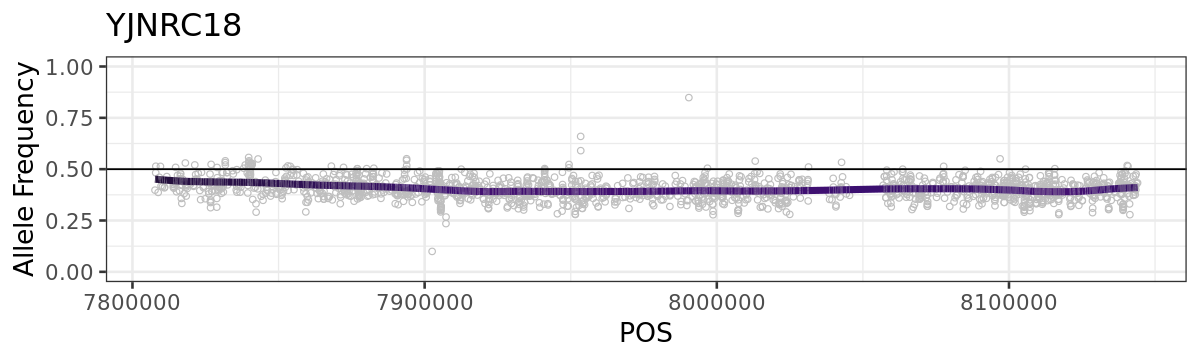

[1] "YJNRC2"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


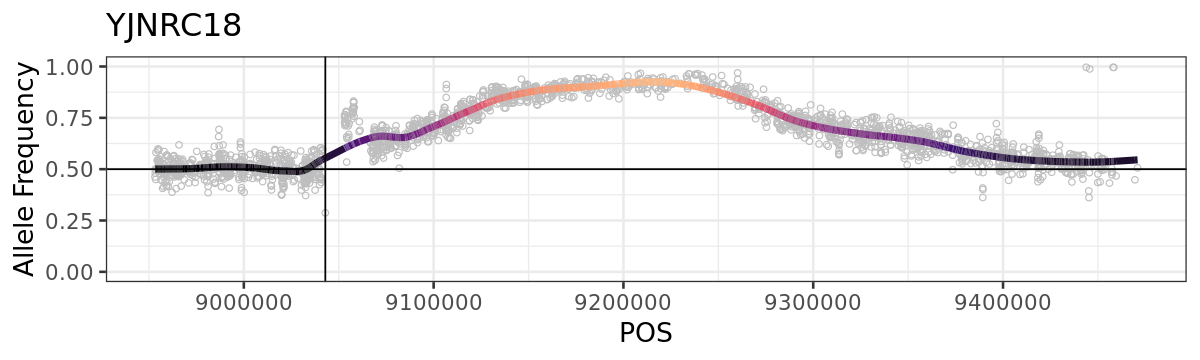

[1] "Fraction AD_A1==sumCount: 0.000331936434172856"
[1] "Mean AF: 0.520775395821747"


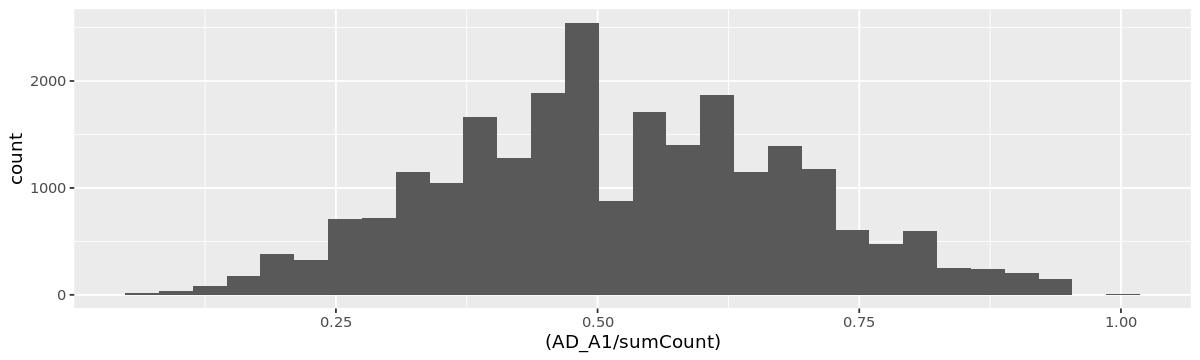

[1] ID           lengthSNPs   global_start global_end  
<0 rows> (or 0-length row.names)


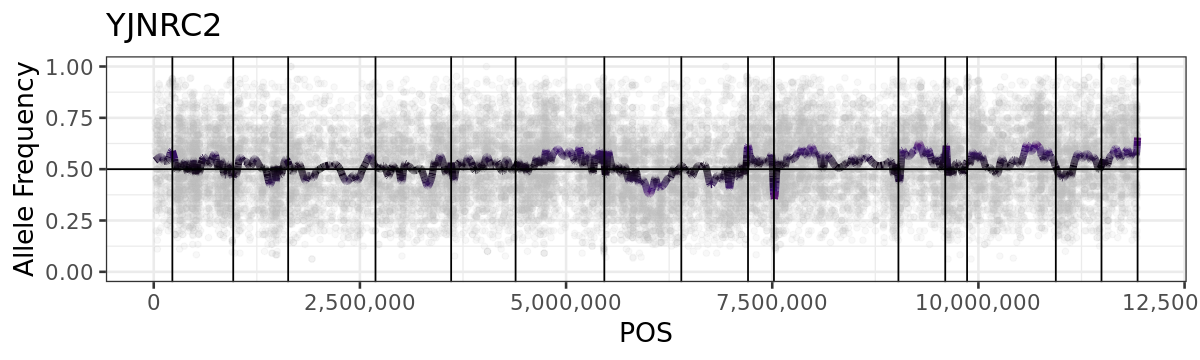

In [5]:
for(s in 1:length(crosses)){
    # this will gather all the data that was aggregated from the VCFs in the previous 01_Mapping notebooks to get allele depths in the cross and the opposite homozygous loci in the parental strains, plot them, and plot the outliers (hard-definied)
    sample=crosses[s]
    print(sample)
    hetLoci=fread(paste0("~/data/trd/mapped_reads/",sample,".hetLoci.gz"))
    colnames(hetLoci)=c("chr","pos","alleles","ADcross")

    hetLoci$DPcross=NA
    for(i in 1:nrow(hetLoci)){
        hetLoci$DPcross[i]=sum(as.numeric(strsplit(hetLoci$ADcross[i], ",", fixed=TRUE)[[1]]))
    }

    hetLoci=subset(hetLoci, DPcross <= quantile(DPcross, 0.95))



    OH1=fread(paste0('/home/jnrunge/data/trd/mapped_reads/',Crosses$`Short name 1`[Crosses$`Cross ID`==sample],'.homLoci.gz'))
    OH2=fread(paste0('/home/jnrunge/data/trd/mapped_reads/',Crosses$`Short name 2`[Crosses$`Cross ID`==sample],'.homLoci.gz'))

    colnames(OH1)=c("chr","pos","alleles","GT1")
    colnames(OH2)=c("chr","pos","alleles","GT2")
    OH=full_join(OH1,OH2, by=c("chr","pos","alleles"))

    OH=subset(OH, !is.na(GT1) & !is.na(GT2))
    OH=subset(OH, substr(GT1,1,1) == substr(GT1,3,3))
    OH=subset(OH, substr(GT2,1,1) == substr(GT2,3,3))
    OH=subset(OH, substr(GT1,1,1) != substr(GT2,1,1))

    OH_vs_cross=full_join(OH, hetLoci, by=c("chr","pos","alleles"))

    if(sum(duplicated(OH_vs_cross[,c(1,2)]))>0){
        stop()
    }
    OH_vs_cross=subset(OH_vs_cross, !is.na(ADcross) & !is.na(GT1) & !is.na(GT2))
      if(nrow(OH_vs_cross)==0){
          df_fit$countLociFit[i]=0
          next
      } 

    OH_vs_cross=OH_vs_cross[unlist(lapply(1:nrow(OH_vs_cross), isSNP)),]
    OH_vs_cross=bind_cols(OH_vs_cross, bind_rows(lapply(1:nrow(OH_vs_cross), getAD)))
    OH_vs_cross$Allele1=substr(OH_vs_cross$GT1, 1,1)
    OH_vs_cross$Allele2=substr(OH_vs_cross$GT2, 1,1)


    OH_vs_cross$AD_A1=NA
    OH_vs_cross$AD_A2=NA

    for(i in 1:nrow(OH_vs_cross)){
        OH_vs_cross$AD_A1[i]=OH_vs_cross[i, paste0("AD3_",OH_vs_cross$Allele1[i])]
        OH_vs_cross$AD_A2[i]=OH_vs_cross[i, paste0("AD3_",OH_vs_cross$Allele2[i])]
    }



    chrs=summarise(group_by(OH_vs_cross, chr),maxpos=max(pos))

    OH_vs_cross$global_pos=OH_vs_cross$pos
    for(c in 2:length(unique(OH_vs_cross$chr))){
        chr=unique(OH_vs_cross$chr)[c]
        OH_vs_cross$global_pos[OH_vs_cross$chr==chr]=OH_vs_cross$pos[OH_vs_cross$chr==chr]+sum(chrs$maxpos[chrs$chr%in%unique(OH_vs_cross$chr)[1:(c-1)]])
    }

    chrs$global_pos=cumsum(chrs$maxpos)

    OH_vs_cross$sumCount=OH_vs_cross$AD_A1+OH_vs_cross$AD_A2
    OH_vs_cross=subset(OH_vs_cross, sumCount > 0)
    OH_vs_cross=subset(OH_vs_cross, sumCount<=quantile(OH_vs_cross$sumCount, 0.95) & sumCount>=quantile(OH_vs_cross$sumCount, 0.05))

    OH_vs_cross=subset(OH_vs_cross, (sumCount/DPcross) > 0.99)
    

    print(ggplot(OH_vs_cross, aes((AD_A1/sumCount)))+
         geom_histogram())

    print(paste("Fraction AD_A1==sumCount:",sum(OH_vs_cross$AD_A1==OH_vs_cross$sumCount) / nrow(OH_vs_cross)))
    print(paste("Mean AF:",mean(OH_vs_cross$AD_A1/OH_vs_cross$sumCount)))

    chr_summary=summarise(group_by(OH_vs_cross,chr), meanAF=mean(AD_A1/sumCount))

    options(repr.plot.width=10, repr.plot.height=3)

    loessMod50 <- loess((AD_A1/sumCount) ~ global_pos, data=OH_vs_cross, span=0.01)
    smoothed50 <- predict(loessMod50) 
    OH_vs_cross$smoothed=smoothed50

    library(scales)

    print(ggplot(OH_vs_cross, aes(global_pos, AD_A1/sumCount))+
    geom_point(alpha=0.1,color="grey")+geom_line(mapping=aes(global_pos, smoothed, color=abs(0.5-smoothed)), inherit.aes=FALSE, linewidth=2)+
    scale_color_viridis_c(option="A", limits = c(0,0.5))+
          ylim(c(0,1))+geom_hline(yintercept = 0.5)+
    geom_vline(xintercept = chrs$global_pos)+theme_bw(16)+ylab("Allele Frequency")+xlab("POS")+theme(legend.position = "none")+
          #geom_hline(yintercept = c(0.4,0.6))+
    ggtitle(sample)+labs(alpha="Coverage")+scale_x_continuous(labels = comma))

    rle_trd=rle(x = abs(0.5-OH_vs_cross$smoothed)>0.1)
    rle_trd
    
    # this is for plotting and the boundaries are not precise if distortion starts at POS=1
    trd_regions=data.frame(ID=1:sum(rle_trd$values==TRUE), 
                          lengthSNPs=rle_trd$lengths[rle_trd$values==TRUE],global_start=OH_vs_cross$global_pos[cumsum(rle_trd$lengths)[PosMinus1Except1(which(rle_trd$values==TRUE))]+1],
                          global_end=OH_vs_cross$global_pos[cumsum(rle_trd$lengths)[(which(rle_trd$values==TRUE))]])
    trd_regions=subset(trd_regions, lengthSNPs>=500)
    print(trd_regions)
    if(nrow(trd_regions)==0){
        next
    }
    for(i in 1:nrow(trd_regions)){
        print(ggplot(subset(OH_vs_cross, global_pos>=(trd_regions$global_start[i]-100000) & 
                            global_pos<=(trd_regions$global_end[i]+100000)), aes(global_pos, AD_A1/sumCount))+
        geom_point(shape=1,color="grey")+
        theme_bw(16)+ylab("Allele Frequency")+xlab("POS")+geom_line(mapping=aes(global_pos, smoothed, color=abs(0.5-smoothed)), inherit.aes=FALSE, linewidth=2)+theme(legend.position="none")+
    scale_color_viridis_c(option="A", limits = c(0,0.5))+
    geom_vline(xintercept = chrs$global_pos[chrs$global_pos>=(trd_regions$global_start[i]-100000) & 
                            chrs$global_pos<=(trd_regions$global_end[i]+100000)])+
        ggtitle(sample)+labs(alpha="Coverage")+ geom_hline(yintercept = 0.5)+ylim(c(0,1)))
    }
}